In [5]:
import numpy as np
from numpy.fft import fft, ifft

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [6]:
np.set_printoptions(threshold=10, edgeitems=1, precision=2)

# Reading Exam Files

Exam directories contain a collection of `<key>.txt` files, each corresponding to the measure of a flux debit accross a particular section. 

The `Exam(dir, *patterns)` constructor will load all files whose `<key>` matches one of the given patterns. 

(See [levels.csv]() for more details on those sections and the list of `<key>` values).

In [7]:
from exam import Exam

exam = Exam('I', 'aqueduc', '*cervi', 'jugul*')

The returned `Exam` instance consists of a dictionnary of flux measures. 

A `Flux` instance represents either an arterial blood, veinous blood or a cerebro-spinal fluid flow:

```
    flux : { 
        type    : 'A' | 'V' | 'CSF',
        debit   : [float],
        surface : [float],
        volume  : [float],
        time    : [float],
        nom     : string,
        name    : string
    }
```

The following code will for instance plot all measured CSF fluxes.

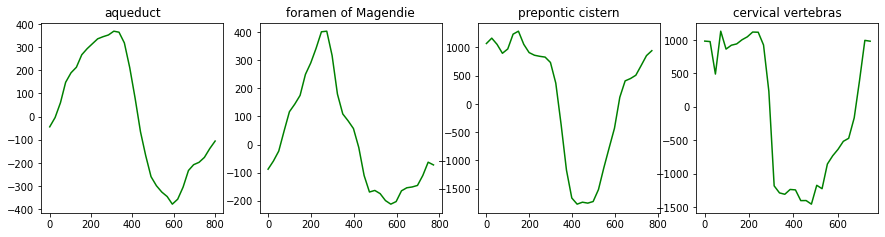

In [11]:
plt.figure(figsize=(15, 3.5))

exam2 = Exam('I')
csf = exam2.filter(lambda v, k: v.type == 'CSF')

i = 1
for flux, key in csf:
    plt.subplot(1, 4, i)
    plt.plot(flux.time, flux.debit, color="green")
    plt.title(flux.name)
    i+= 1

We can do the same with arterial blood fluxes:

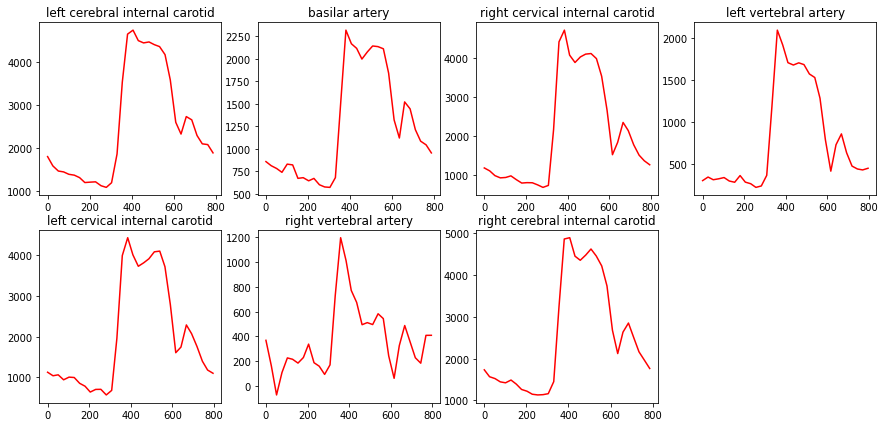

In [12]:
plt.figure(figsize=(15, 7))

arterial = exam2.filter(lambda v, k: v.type == 'A')

i = 1
for flux, key in arterial:
    plt.subplot(2, 4, i)
    plt.plot(flux.time, flux.debit, color="red")
    plt.title(flux.name)
    i+= 1
    

And with veinous blood fluxes:

sinus-s: 1
coro_sinus_lat_g: 1
jugul-d: 1
sinus-d: 1
coro_sinus_s: -1
coro_sinus_d: -1
coro_sinus_lat_d: 1


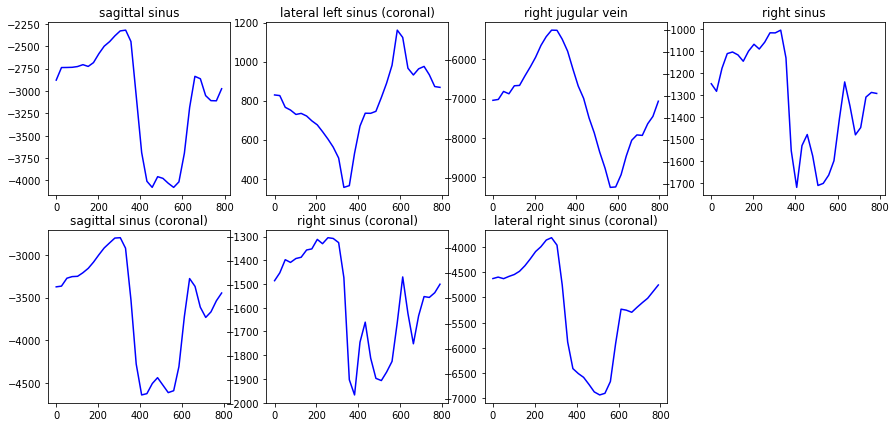

In [13]:
plt.figure(figsize=(15, 7))

veinous = exam2.filter(lambda v, k: v.type == 'V')

i = 1
for flux, key in veinous:
    plt.subplot(2, 4, i)
    sgn = -1 if key in ["coro_sinus_s", "coro_sinus_d"] else 1
    print(f"{key}: {sgn}")
    plt.plot(flux.time, sgn * flux.debit, color="blue")
    plt.title(flux.name)
    i+= 1

In [14]:
N = fluxes[0]['time'].shape[0]

figure(figsize=(15, 4))

for (i, f) in enumerate(fluxes): 
    Fd = fft(f['debit'])
    Fd = np.fft.fftshift(Fd)
    power = np.abs(Fd)
    angle = np.angle(Fd)
    plt.subplot(2, 3, i+1)
    plt.plot(power, color=colors[i])
    plt.subplot(2, 3, i+4)
    plt.plot(angle, color=colors[i])


NameError: name 'fluxes' is not defined

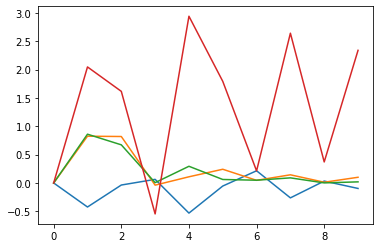

In [81]:
flux_in = exam['cid_cervi']['debit']
flux_out = exam['jugul-d']['debit']

spec_in = fft(flux_in)
spec_out = fft(flux_out)

spec_in[0] = 0
spec_out[0]= 0

N = 10
freq = np.arange(N)
transfer = spec_out / (spec_in + 1e-5)
plt.plot(freq, np.real(transfer[:N]), np.imag(transfer[:N]))
plt.plot(freq, np.abs(transfer[:N]**2))
plt.plot(freq, np.angle(transfer[:N]))

In [83]:
figure(figsize=(25, 30))
for (i, k) in enumerate(exam.keys()):
    x, y = exam[k]['time'], exam[k]['debit']
    #plt.subplot(6, 3, i+1)
    #plt.plot(x, y)
    #plt.title(k)

<Figure size 1800x2160 with 0 Axes>